# Importing Modules and Packages

In [1]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

# Custom Generator

In [2]:
image_dir="/kaggle/input/cats-and-dogs-image-classification/train"

In [3]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self,image_path,image_size=(224,224),batch_size=4,shuffle=True):
        self.image_dir=image_path
        self.image_size=image_size
        self.batch_size=batch_size
        self.shuffle=shuffle
        self.images=[]
        self.labels=[]
        
        self.classes=os.listdir(self.image_dir)
        for i in range(len(self.classes)):
            file_folder=os.path.join(self.image_dir,self.classes[i])
            self.images+=[os.path.join(file_folder,i) for i in os.listdir(file_folder)]
            self.labels.extend([i]*len(os.listdir(file_folder)))
        self.indices=np.arange(len(self.labels))
        if self.shuffle:
            np.random.shuffle(self.indices)
    def __len__(self):
        return len(self.labels)//self.batch_size
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)
    def __getitem__(self,index):
        batch_index=self.indices[index:index+self.batch_size]
        batch_images=[]
        batch_labels=[]
        for i in batch_index:
            batch_images.append(img_to_array(load_img(self.images[i],target_size=self.image_size)))
            batch_labels.append(self.labels[i])
        
        return np.array(batch_images),np.array(batch_labels)

# Creating Object

In [4]:
obj=CustomDataGenerator(image_dir)

# Showing Images and corresponding Labels

In [5]:
pd.DataFrame(data=dict(Images=obj.images,Labels=obj.labels))

,Images,Labels
0,/kaggle/input/cats-and-dogs-image-classificati...,0
1,/kaggle/input/cats-and-dogs-image-classificati...,0
2,/kaggle/input/cats-and-dogs-image-classificati...,0
3,/kaggle/input/cats-and-dogs-image-classificati...,0
4,/kaggle/input/cats-and-dogs-image-classificati...,0
...,...,...
552,/kaggle/input/cats-and-dogs-image-classificati...,1
553,/kaggle/input/cats-and-dogs-image-classificati...,1
554,/kaggle/input/cats-and-dogs-image-classificati...,1
555,/kaggle/input/cats-and-dogs-image-classificati...,1


# Visualizing Result

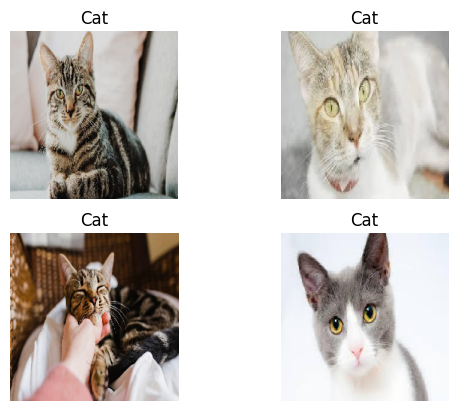

In [6]:
images,labels=obj[0]
def plot_fetched_images(images,labels):
    count=0
    class_dict={
    0:'Dog',
    1:'Cat'}
    fig,axis=plt.subplots(2,2)
    for i in range(2):
        for j in range(2):
            axis[i][j].imshow(images[count]/255.0)
            axis[i][j].set_title(class_dict[labels[count]])
            axis[i, j].axis('off')
            count+=1
    plt.show()
plot_fetched_images(images,labels)
            
            